<a href="https://colab.research.google.com/github/camocola/ADA-informes/blob/main/Informe_4-QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de ordenamiento**

**Entrada:** Arreglo de números $[a_1, ..., a_n]$.

**Salida:** Arreglo ordenado de menor a mayor, tal que $a_1 <= a_2 <= ... <= a_n$, o viceversa.

El tamaño del problema es indicado por la cantidad de datos ingresados en la entrada, por lo cual correspondería a **n**.

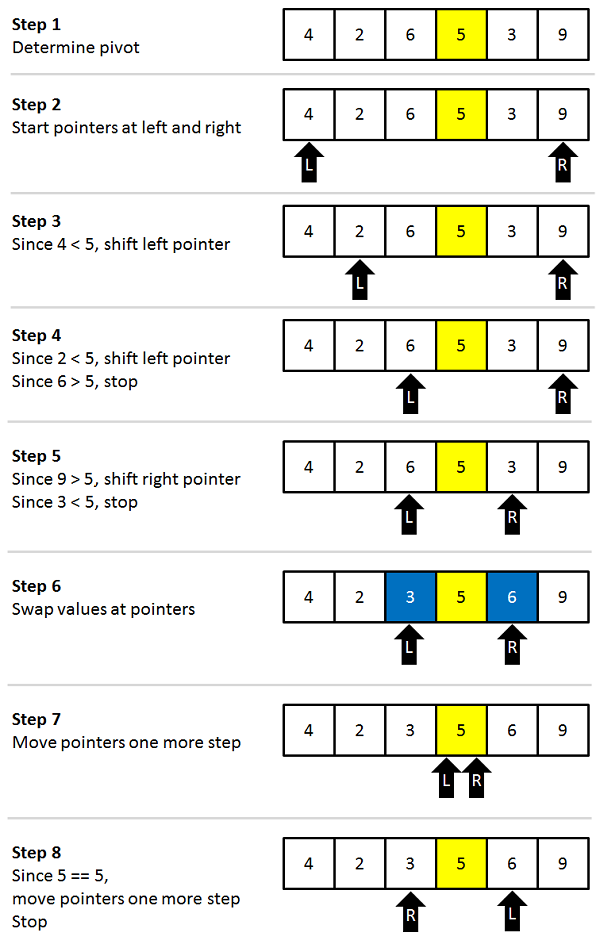


Desde el comienzo de la era tecnológica ha sido un tema a investigar el problema de ordenamiento, el cual es una incertidumbre que acompleja a las personas desde hace miles de años. 

En este informe hablaremos del algoritmo de ordenamiento *QuickSort:* ocupando el paradigma *Divide y vencerás*, este algoritmo puede ser implementado para resolver algunos problemas reales. Por ejemplo, se puede ocupar para el monitoreo de pacientes en hospitales, donde la cantidad total de pacientes se divide y ordena de modo que aquellos que estén más graves y necesiten que estén más pendientes de ellos sean los primeros en la lista de prioridad, mientras que aquellos que no están en condición crítica van a estar al final de la lista. Esto se lograría tomando un punto medio en la gravedad de los pacientes, y ordenando mediante ese criterio. 

# **2. QuickSort**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **QuickSort**.

### Partition last

In [31]:
from termcolor import colored

def quicksortLast (array, left, right, cont, verbose = False):  
  #comprobamos que el arreglo tiene al menos dos elementos 
  if (left < right):
    partition_pos = partitionLast(array, left, right, cont, verbose)

    if (verbose == True):
      print("Subarreglo izquierdo: ", colored(f"{str(array[:partition_pos])}", "magenta"), "<", array[partition_pos])
      print("Subarreglo derecho: ", colored(f"{str(array[partition_pos + 1:])}", "cyan"), ">", array[partition_pos])

    quicksortLast(array, left, partition_pos-1, cont, verbose) #se llama quicksort en todos los elementos que son menores al pivote
    quicksortLast(array, partition_pos+1, right, cont, verbose) #se llama quicksort en todos los elementos mayores al pivote


#partition tomando el último elemento como pivote
def partitionLast(array, left, right, cont, verbose = False):
  i = left #indice más a la izquierda del arreglo, se mueve hacia la derecha buscando un elemento mayor al pivote
  j = right - 1 #indice a la izquierda del pivote, se mueve hacia la izquierda buscando un elemento menor al pivote
  pivot = array[right] 
  if (verbose == True):
    print("Pivote seleccionado: ", colored(f"{str(array[right])}", "red"))

  #mientras que los índices no se crucen
  while i < j:
    cont[0] += 1
    #mientras que i no esté al final del arreglo y el elemento en el indice i es menor al pivote
    while i < right and array[i] < pivot:
      cont[0] += 1
      i += 1
    #mientras que j no esté al comienzo del arreglo y el elemento en el índice sea mayor o igual al pivote
    while j > left and array[j] >= pivot:
      cont[0] += 1
      j -= 1

    #si los elementos no se han cruzado implementamos un swap
    if (i < j):
      if (verbose == True):
        print("No se han cruzado (i,j): ", i, "< ", j)
      array[i], array[j] = array[j], array[i]
    cont[0] += 1 

  #si el elemento en la posición i es mayor al pivote se realiza un swap
  if (array[i] > pivot):
    if (verbose == True):
      print("Se realiza un intercambio: ", array[i], "> ", pivot)
    array[i], array[right] = array[right], array[i]
  cont[0] += 1

  return i

#Ejemplo
A = [2, 1, 8, 6, 5, 7, 3, 4]
print("Arreglo ingresado = ", A)
cont = [0]
quicksortLast(A, 0, len(A)-1, cont, verbose = False)
print("El arreglo ordenado es = ", A)
print("Cantidad de comparaciones: ", cont[0])

Arreglo ingresado =  [2, 1, 8, 6, 5, 7, 3, 4]
El arreglo ordenado es =  [1, 2, 3, 4, 5, 6, 7, 8]
Cantidad de comparaciones:  25


### Partition first

In [32]:
def quicksortFirst (array, left, right, cont, verbose = False): 
  #comprobamos que el arreglo tiene al menos dos elementos 
  if (left < right):
    partition_pos = partitionFirst(array, left, right, cont, verbose)

    quicksortFirst(array, left, partition_pos-1, cont, verbose) #se llama quicksort en todos los elementos que son menores al pivote
    quicksortFirst(array, partition_pos+1, right, cont, verbose) #se llama quicksort en todos los elementos mayores al pivote


#partition tomando el primer elemento como pivote
def partitionFirst(array, left, right, cont, verbose = False):
  pivot = array[left]
  i = left + 1 #indice a la derecha del pivote, se mueve hacia la derecha buscando un elemento mayor al pivote 
  j = right  #indice al final del arreglo, se mueve hacia la izquierda buscando un elemento menor al pivote
 
  #buscar el punto de cruce
  while True:
      cont[0] += 1
      # avanza el índice menor (i)
      while i <= j and array[i] <= pivot:
          cont[0] += 1
          i += 1   
      # avanza el índice mayor (j)
      while  array[j] >= pivot and j >= i:
          cont[0] += 1
          j -= 1  
      # si los índices se cruzan hemos encontrado el punto de partición
      if j < i:
          cont[0] += 1
          break
          
      else: #si no se cruzaron
          cont[0] += 1
          array[i], array[j] = array[j], array[i]
          
  #se realiza el intercambio
  array[left], array[j] = array[j], array[left]

  # retornar el índice del punto de partición
  return j

#Ejemplo
A = [2, 1, 8, 6, 5, 7, 3, 4]
print("Arreglo ingresado = ", A)
cont = [0]
quicksortFirst(A, 0, len(A)-1, cont, verbose = False)
print("El arreglo ordenado es = ", A)
print("Cantidad de comparaciones: ", cont[0])

Arreglo ingresado =  [2, 1, 8, 6, 5, 7, 3, 4]
El arreglo ordenado es =  [1, 2, 3, 4, 5, 6, 7, 8]
Cantidad de comparaciones:  31


### Partition mid

In [41]:
import random
import numpy as np

#función para el cálculo de la mediana de tres elementos aleatorios
def getMedian(array, left, right, cont):
  n = len(array)
  rand = [0,0,0]
  for i in range (0,3):
    rand[i] = array[random.randint(left, right)]
  
  np.sort(rand)
  k = array.index(rand[1])
  return k 

#tomando la mediana de tres elementos aleatorios como pivote
def partitionMid(array, left, right, cont):

  median = getMedian(array, left, right, cont)
  array[left], array[median] = array[median], array[left]
  pivot = array[left]
  i = left

  # Se recorre desde la posición 1 del arreglo hasta el final
  for j in range(left + 1, right + 1):
    cont[0] += 1
    # Si el elemento es menor se realiza un intercambio
    if (array[j] < pivot):
        i = i + 1
        array[i], array[j] = array[j], array[i]
    cont[0] += 1

  # Se cambia el puntero por el menor elemento
  array[i], array[left] = array[left], array[i]

  return i

def quicksortMid (array, left, right, cont): 
  # Mientras el largo del arreglo tenga al menos dos elementos
  if (left < right):
    partition_pos = partitionMid(array, left, right, cont)
    quicksortMid(array, left, partition_pos - 1, cont)     # #se llama quicksort en todos los elementos que son menores al pivote
    quicksortMid(array, partition_pos + 1, right, cont)   ##se llama quicksort en todos los elementos que son mayores al pivote

#Ejemplo
cont =[0]
A = [2, 1, 8, 6, 5, 7, 3, 4]
print("Arreglo ingresado:", A)
quicksortMid(A, 0, len(A)-1, cont)
print("El arreglo ordenado es: ", A)
print ("Cantidad de comparaciones: ", cont[0])

Arreglo ingresado: [2, 1, 8, 6, 5, 7, 3, 4]
El arreglo ordenado es:  [1, 2, 3, 4, 5, 6, 7, 8]
Cantidad de comparaciones:  32


## 2.2. Descripción del algoritmo

El algoritmo *QuickSort* recibe como entrada una lista (o arreglo) ***array*** con una cantidad de **n** elementos, en donde tendrá que ordenar el arreglo de menor a mayor o viceversa. El algoritmo *QuickSort* se implementa de forma *recursiva*.

Consideremos *p* como partition:

1.   Se divide el arreglo en dos subarreglos.

2.   Para cada subarreglo se cumple que todos los elementos de la parte izquierda son menores o iguales a p ($array[0:q] <= q$), y los elementos de la parte derecha son mayores o iguales a p ($q <= array[q+1:n+1]$).

3.   Se vuelve a llamar a *QuickSort* para ordenar cada subarreglo obtenido.

Existen varias formas de implementar la función *partition*:

*   Elegir el primer elemento como pivote.
*   Elegir el último elemento como pivote.
*   Elegir la mediana como pivote.
*   Elegir un elemento aleatorio como pivote.

La clave del algoritmo *QuickSort* es la función *partition*, ya que esta tiene como objetivo al ser entregado un arreglo y un elemento x del arreglo como pivote, poner el elemento en su posición correcta y mover todos los elementos menores al pivote a su izquierda y todos los mayores a su derecha. A continuación vemos los pasos que sigue la función:

1.   Se escoge un pivote. Los valores de *i* y *j* van cambiando según la posición del pivote que seleccionemos. Por ejemplo, si tomamos el último elemento del arreglo como pivote, **i** comienza desde la izquierda y **j** desde la derecha - 1. 

2.   Se itera *i* (i+=1) mientras el elemento en esa posición no sea mayor al pivote y este no llegue al final del arreglo. A su vez se itera *j* (j-=1) mientras este sea mayor o igual al pivote y no esté en el comienzo del arreglo. 

3. Si ```i < j``` siginifica que no se han cruzado y se efectúa un intercambio de los elementos en sus índices.

4.   Si la posición *i* es mayor al pivote, se realiza un *swap* y se retorna la posición *i*, la cual es el punto en donde se dividirá el arreglo.

Si la variable `verbose` es `True` se muestra información para ver lo que ocurre paso a paso dentro de la función.

## 2.3. Ejemplo


En la siguiente imagen se considera el arreglo de entrada **A = [2, 1, 8, 6, 5, 7, 3, 4]**.

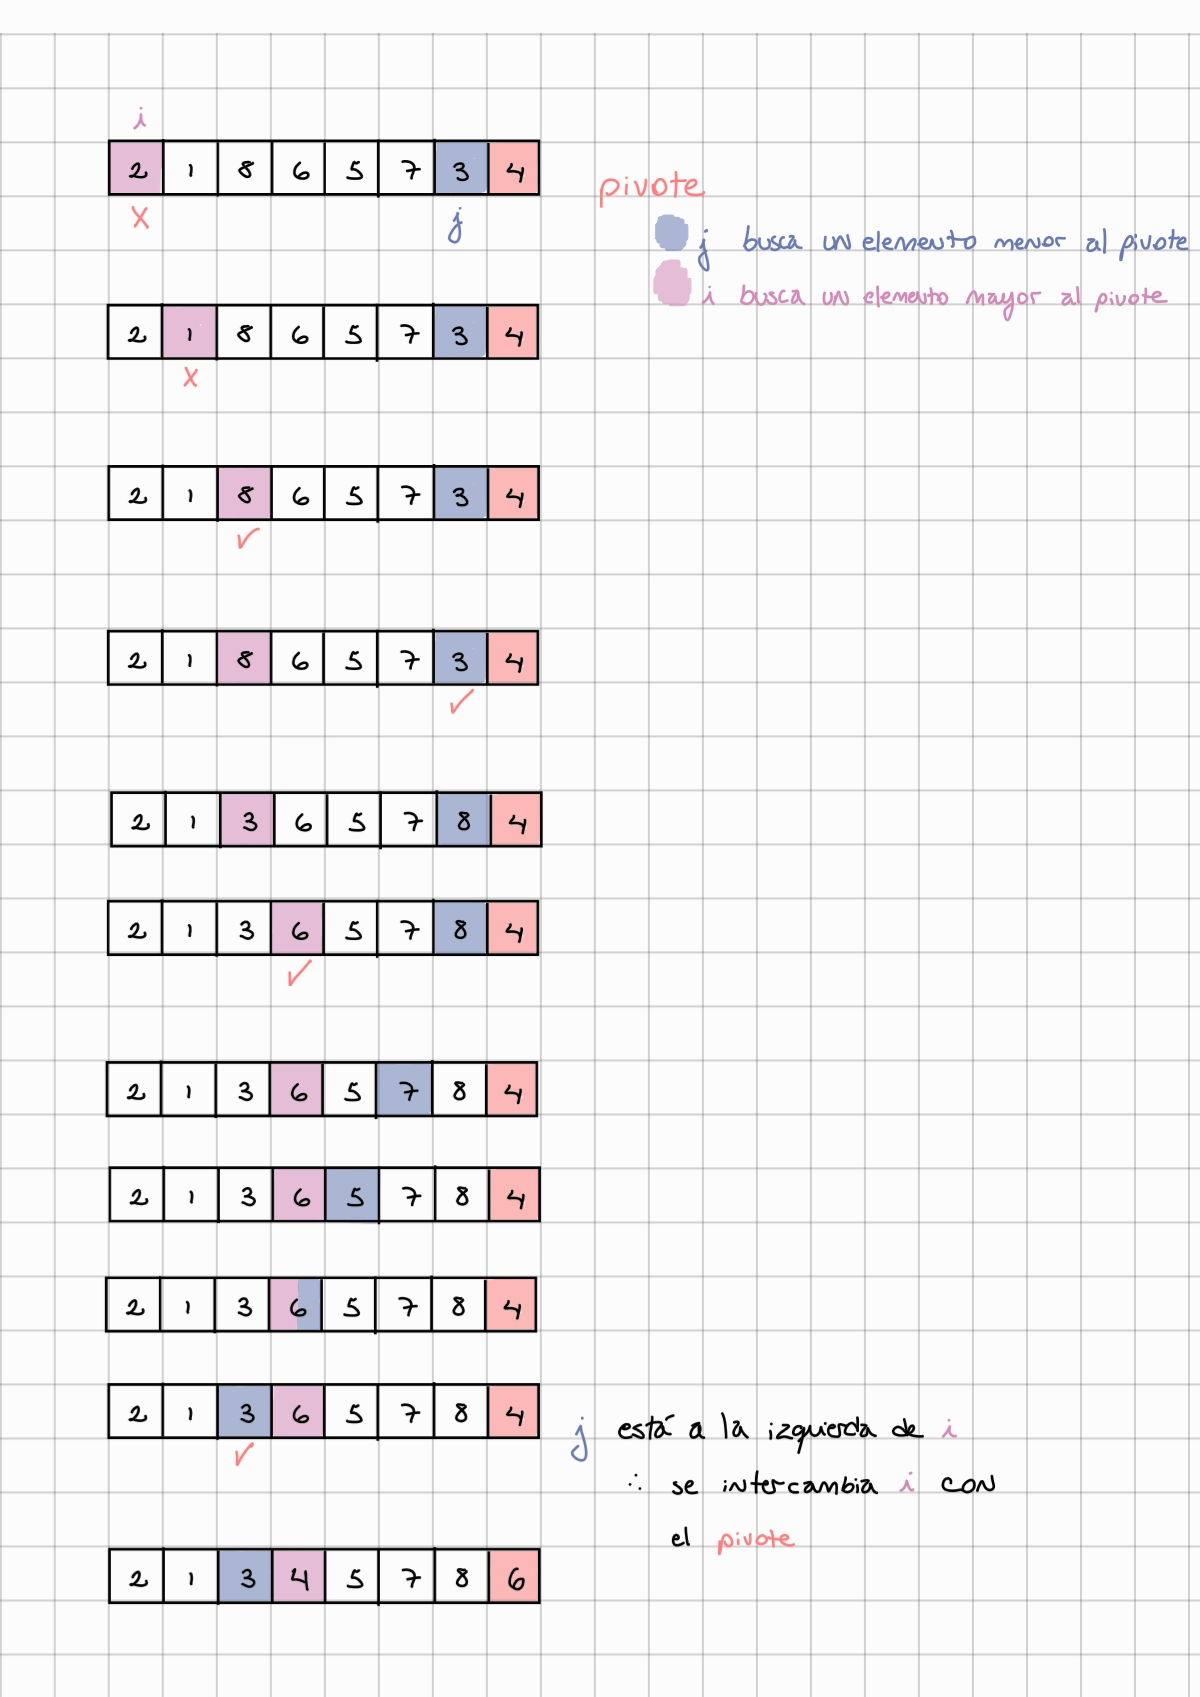

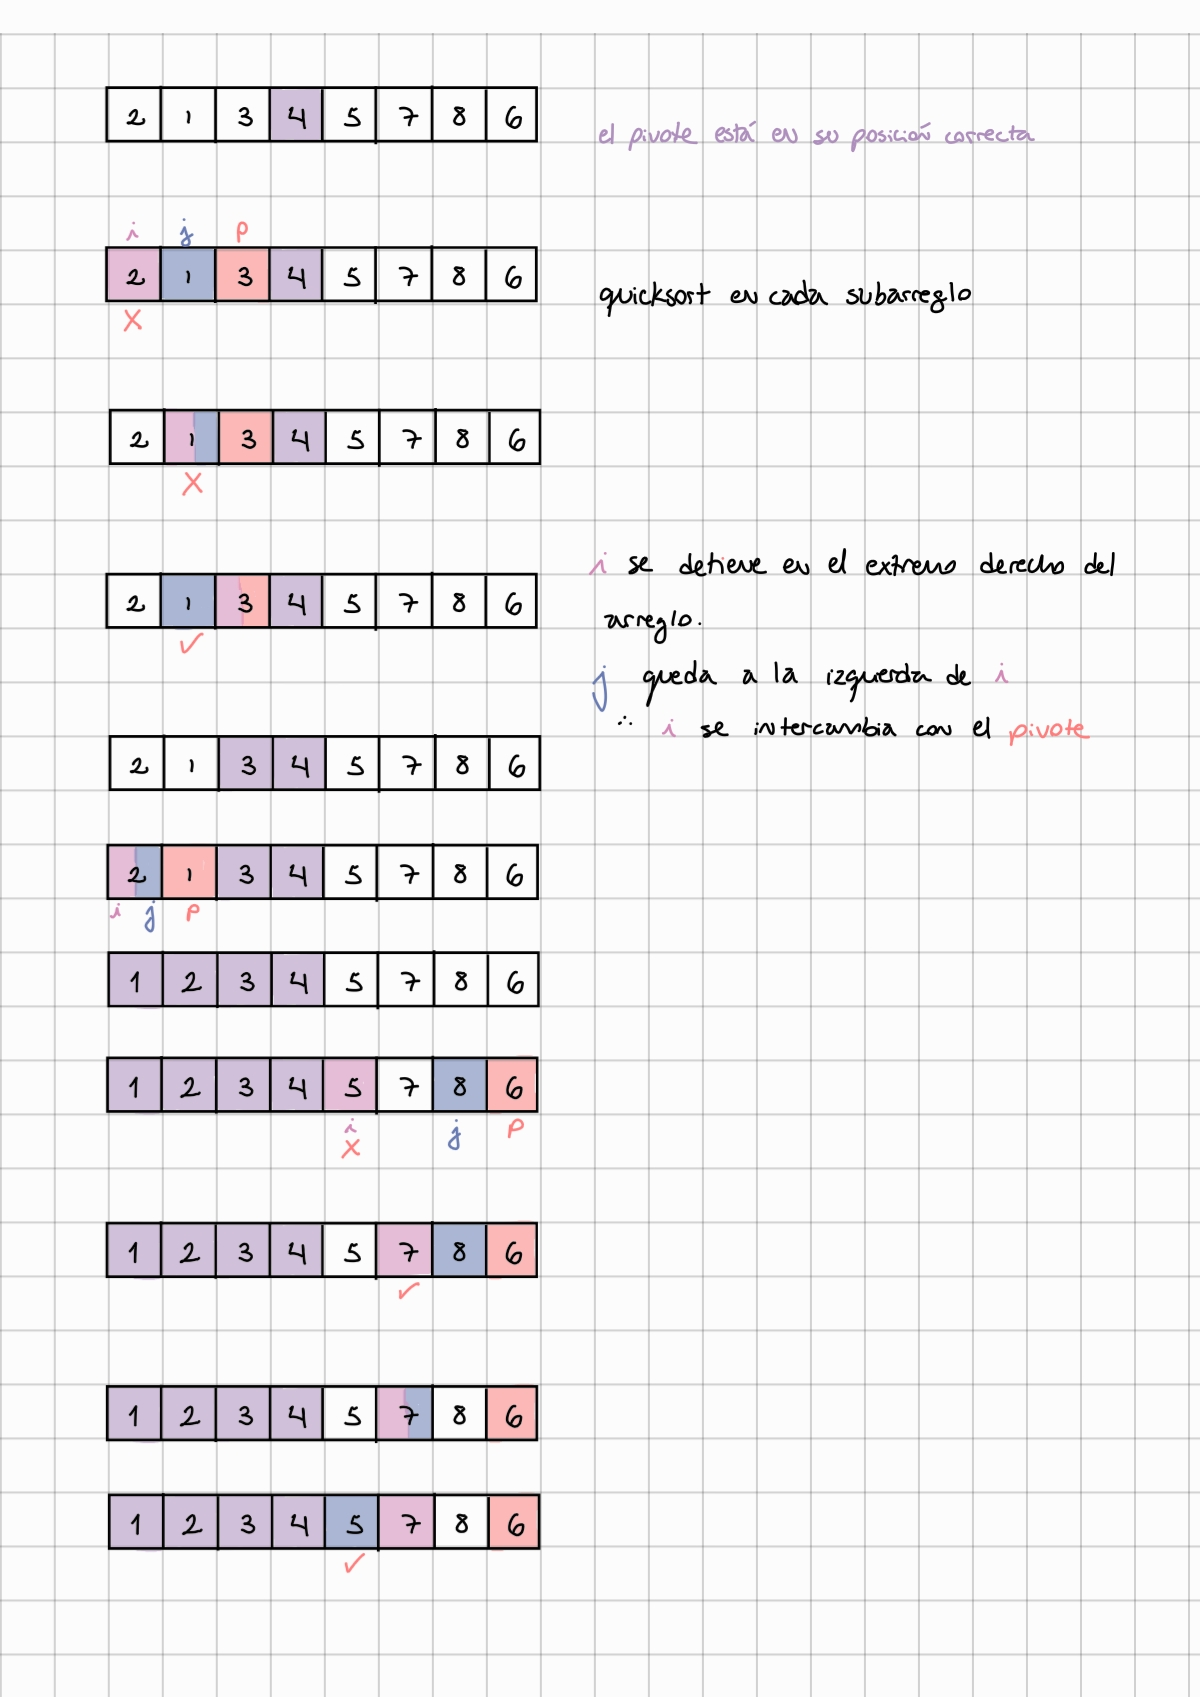

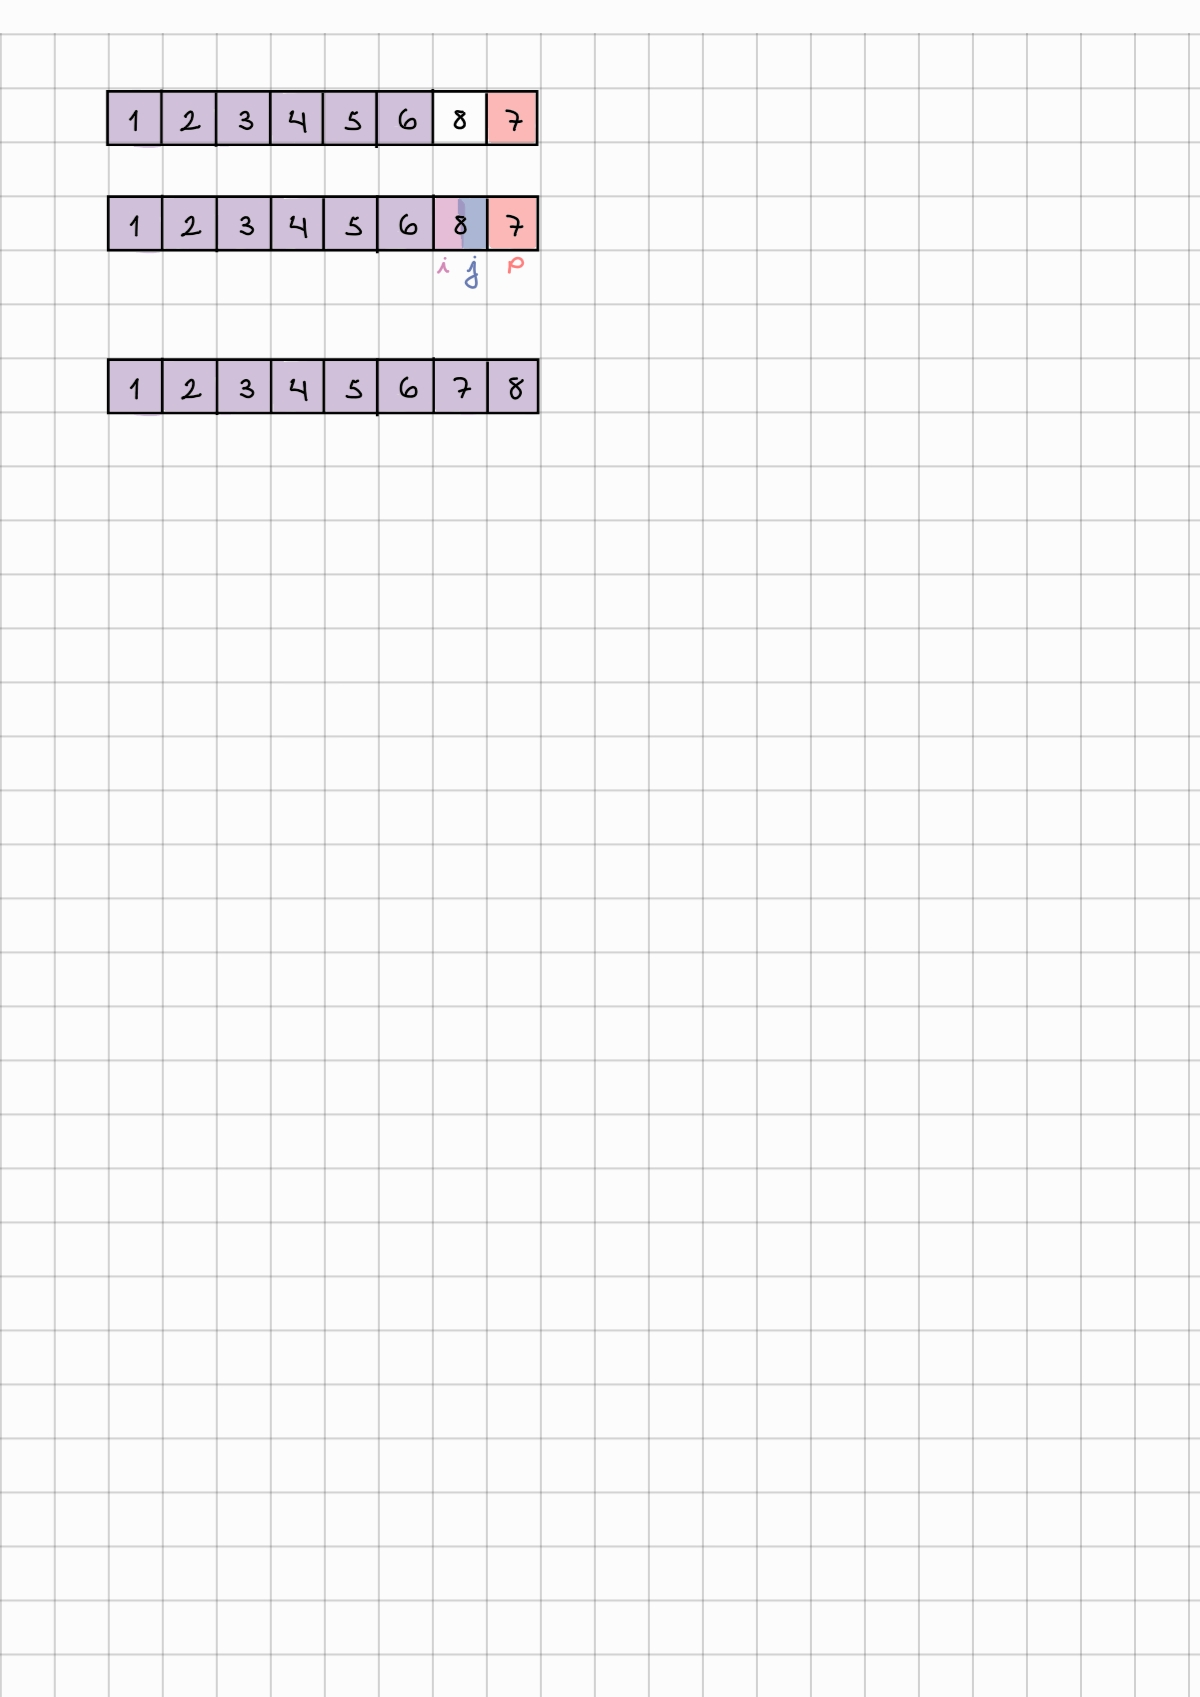

## 2.4. Ejecución del algoritmo paso a paso (`verbose = True`)

Utilizando la opción `verbose = True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [43]:
import random
a = random.sample(range(-100, 100), 6)
print("Arreglo de entrada: ", a, "\n")
n = len(a)
cont = [0]
quicksortLast(a, 0, n-1, cont, verbose=True)
print("\nArreglo ordenado: ", a)

Arreglo de entrada:  [61, -94, -92, 49, -17, -84] 

Pivote seleccionado:  -84
No se han cruzado (i,j):  0 <  2
Se realiza un intercambio:  61 >  -84
Subarreglo izquierdo:  [-92, -94] < -84
Subarreglo derecho:  [49, -17, 61] > -84
Pivote seleccionado:  -94
Se realiza un intercambio:  -92 >  -94
Subarreglo izquierdo:  [] < -94
Subarreglo derecho:  [-92, -84, 49, -17, 61] > -94
Pivote seleccionado:  61
Subarreglo izquierdo:  [-94, -92, -84, 49, -17] < 61
Subarreglo derecho:  [] > 61
Pivote seleccionado:  -17
Se realiza un intercambio:  49 >  -17
Subarreglo izquierdo:  [-94, -92, -84] < -17
Subarreglo derecho:  [49, 61] > -17

Arreglo ordenado:  [-94, -92, -84, -17, 49, 61]


#**3. Tiempo de ejecución**

## **Teorema**

El algoritmo **QuickSort** tiene un **tiempo de ejecución de** $O(n log(n))$ como el promedio y el mejor caso, y con $O(n^2)$ como el peor caso.

### **Mejor caso:** probado con Teorema maestro

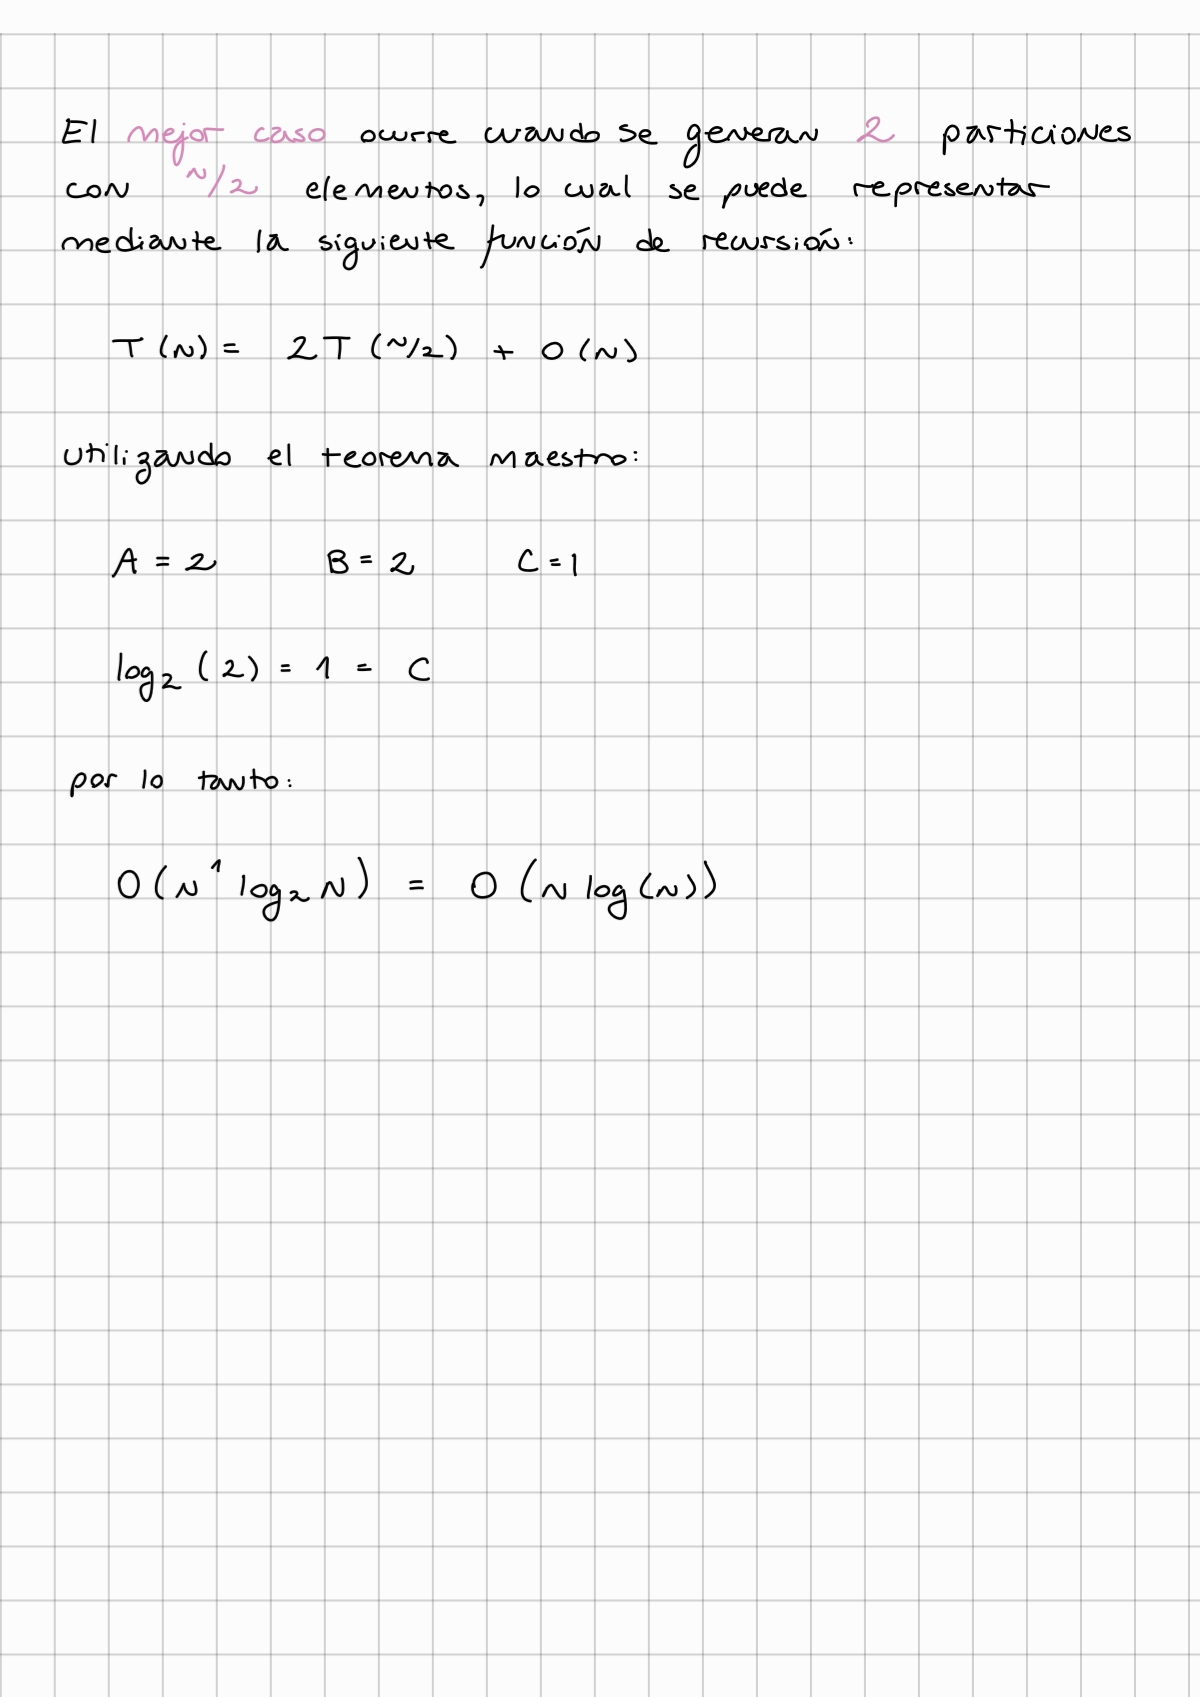

### **Peor caso:** probado con Inducción matemática

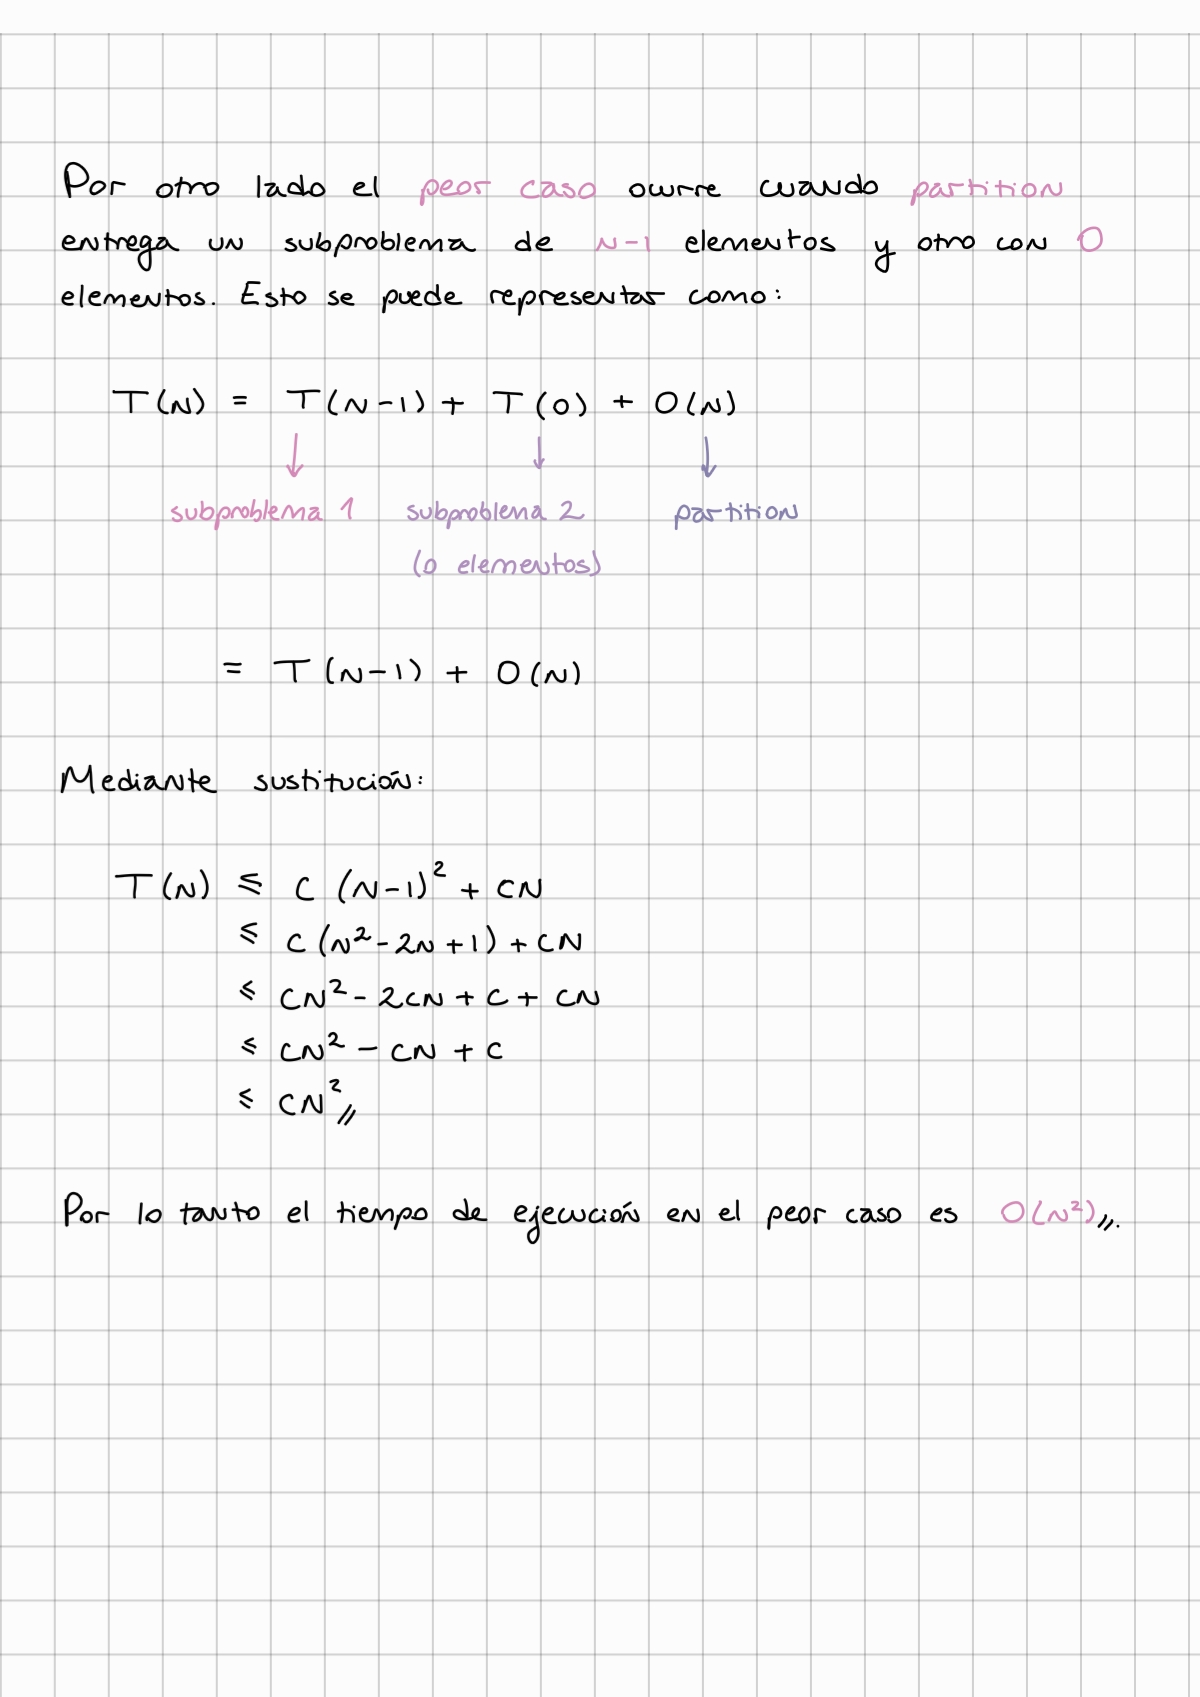

### **Caso promedio**: probado con Árbol de recursión

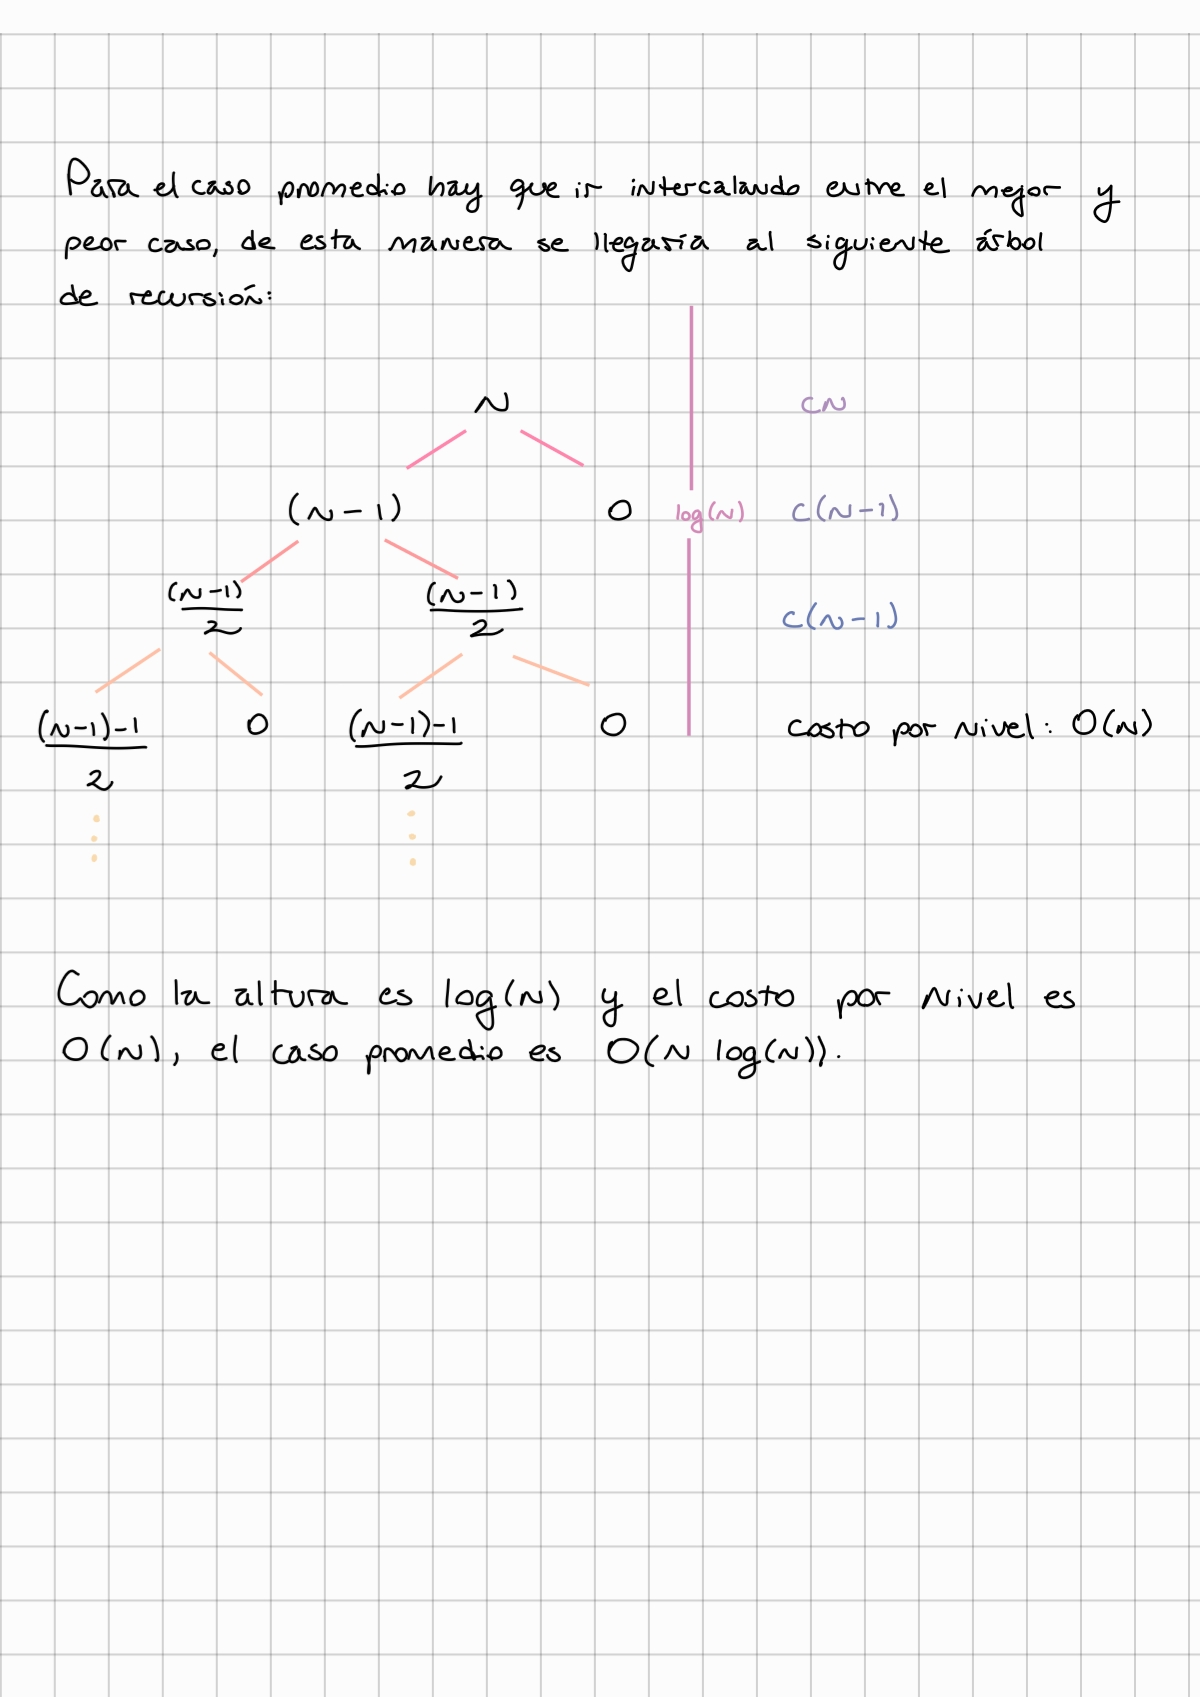

# **4. Correctitud**

##**Teorema**

El algoritmo **QuickSort** genera un arreglo: `[a1,a2,...an]`, con los mismos elementos del arreglo de entrada, pero ordenados de menor a mayor, es decir `a1<=a2<=...<=an`.

Para comprobar el teorema utilizaremos la *inducción matemática* (QuickSort) y la propiedad del *bucle invariante* (Partition).










### **Bucle invariante (Partition)**





La propiedad invariante del bucle nos asegura que la función $partition()$ es correcta.

**Propiedad invariante de bucle:** Al comienzo de cada iteración, para cualquier indice k, tenemos que:

* Si $p≤k≤i$, entonces $arr[k]≤A[r]$

* Si $i<k<j$, entonces $arr[k]>A[r]$

**Inicialización**: Al comienzo de la primera iteración del bucle, no existen elementos entre las variables, por lo cual la propiedad se cumple.

**Mantención:** Una vez inicializado el loop for, tenemos dos casos:


*   $arr[ j ] ≤  arr[ r ]$
*   $arr[ j ]  >  arr[ r ]$

Al ocurrir el primer caso se realiza un **swap** entre $arr[j]$ y $arr[i]$, y se aumentaría el valor de *i*, de esta manera cumpliendo la propiedad.

En el segundo caso solamente se aumentaría el valor de j, y de esta manera la propiedad se seguirá cumpliendo, ya que $a[j]≤a[r]$ no se cumple.

**Finalización**: El bucle finaliza cuando $r = j$, llegados a este punto el arreglo se dividirá en 3 partes, los menores al pivote, los mayores y el pivote que es el punto de partición.

### **Inducción matemática (QuickSort)**


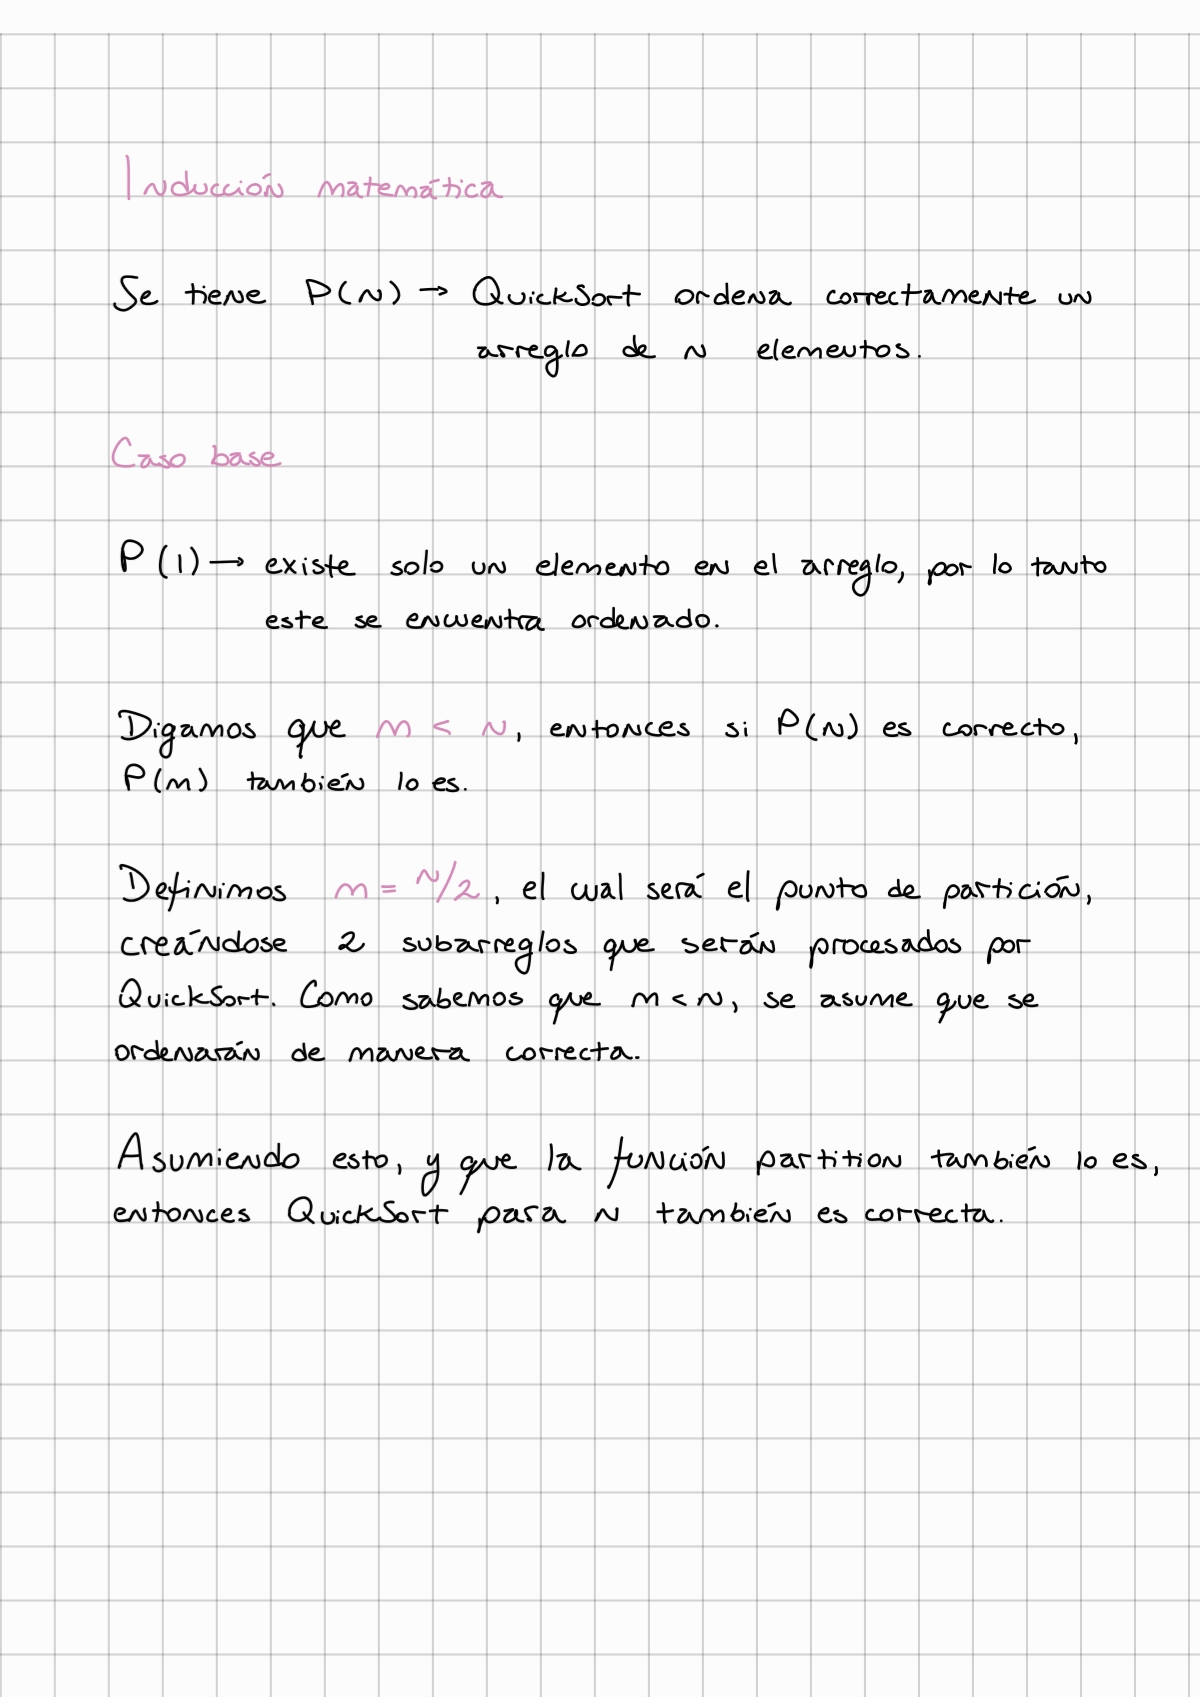

# **5. Experimentos.**

## 5.1. Cantidad de comparaciones realizadas en el mejor y peor caso teórico

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente, 
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,49]$.

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre 1 y 100.

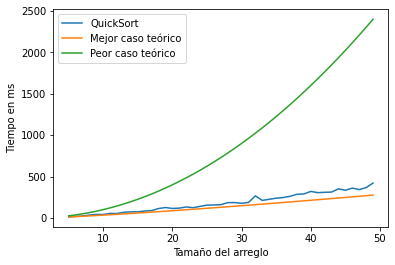

In [44]:
import matplotlib.pyplot as plt
import random
from math import log2

x=[n for n in range(5,50)] 
y1=[n*log2(n) for n in range(5,50)] # mejor caso teórico
y2=[n**2 for n in range(5,50)] # peor caso teórico
y=[]; 


for n in range(5,50):

  a = random.sample(range(1, 100), n)
  verbose = False
  cont = [0]
  quicksortLast(a, 0, len(a)-1, cont, verbose)
  y.append(cont[0])


plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["QuickSort", "Mejor caso teórico", "Peor caso teórico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados.

En el gráfico se puede apreciar de forma clara como el caso promedio está muy cerca del mejor caso. Esto se puede contribuir a que el tiempo de ejecución del caso promedio es igual al del mejor caso, siendo $O(nlog(n))$. Se debe considerar que el tiempo de ejecución del caso promedio es una aproximación, ya que demostrarlo matemáticamente puede ser confuso. Sin embargo, se puede concluir que este algoritmo es una de las mejores opciones disponibles para solucionar un problema de ordenamiento, gracias a su cercanía del caso promedio con el mejor caso. 

## 5.2 QuickSort v/s MergeSort

En los siguientes gráficos se reporta el tiempo de ejecución de los algoritmos de ordenamiento **QuickSort** y **MergeSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambos algoritmos.

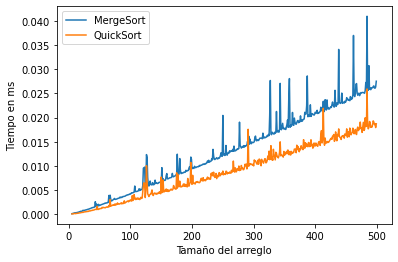

In [45]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

#array de contador de llamadas recursivas y de comparaciones, posición 0 llamadas recursivas/ posición 1 comparaciones del merge
cont = [0,0]

def merge(array, izquierda, derecha, verbose, cont):
  #iteradores para revisar cada mitad
  i = 0
  j = 0
  #iterador para variable central
  k = 0

  while i < len(izquierda) and j < len(derecha):
        if izquierda[i] <= derecha[j]:
          #se inserta el valor de la izquierda 
          cont[1] += 1
          array[k] = izquierda[i]
          i += 1
        else:
          #se inserta el valor de la derecha
          cont[1] += 1
          array[k] = derecha[j]
          j += 1
        #moverse a la siguiente casilla
        k += 1

  # revisar si hay algún elemento que falta
  while i < len(izquierda):
      array[k] = izquierda[i]
      cont[1] += 1
      i += 1
      k += 1

  while j < len(derecha):
      array[k]=derecha[j]
      cont[1] += 1
      j += 1
      k += 1

def mergeSort(array, cont1, verbose = False):
    if len(array) > 1:
      #dividir el arreglo en 2
      mitad = len(array)//2 
      #asignar derecha e izquierda a las mitades del arreglo
      derecha = array[mitad:]
      izquierda = array[:mitad]

      #llamado recursivo a cada mitad
      cont[0] += 1
      mergeSort(derecha, cont, verbose = False)
      mergeSort(izquierda, cont, verbose = False)
      merge(array, izquierda, derecha, verbose, cont)
      
x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quicksortLast", stmt=f"quicksortLast({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["MergeSort", "QuickSort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados.

A partir del gráfico podemos apreciar que el algoritmo *QuickSort* es más eficiente en tiempo en ms y más estable a través de su ejecución en arreglos de tamaño relativamente pequeño, comparado al algoritmo *MergeSort*. Por ejemplo,* QuickSort* llega a tener como máximo 0,02 ms, mientras que *MergeSort* llega hasta los 0,04 ms. De igual manera, se le pueden atribuir los *peaks* tan elevados que se muestran en el algoritmo *MergeSort* a lo impredecible del procesador. 

Además, se puede decir que *QuickSort* es más eficiente que *MergeSort* ya que no necesita espacio extra para poder reordenar el arreglo entregado, mientras que MergeSort necesita un espacio extra para generar un arreglo temporal para unir los subarreglos ordenados. 

## 5.3 Selección de diversos pivotes

En los siguientes gráficos se compara el tiempo de ejecución del algoritmo de ordenamiento **QuickSort** cuando seleccionamos diversas posiciones como pivote para arreglos generados aleatoriamente de tamaños entre $5$ y $500$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de los tres casos posibles. 

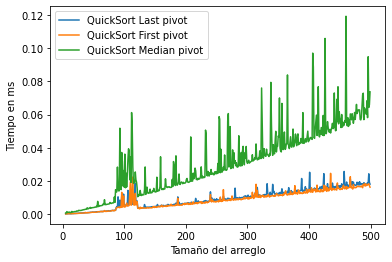

In [42]:
x=[]; y=[]
y1=[]
y2 =[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiempo obtenido.
  t1 = repeat(setup="from __main__ import quicksortLast", stmt=f"quicksortLast({a},{0},{n-1},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quicksortFirst", stmt=f"quicksortFirst({a},{0},{n-1},{cont})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import quicksortMid", stmt=f"quicksortMid({a},{0},{n-1},{cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)
  y2.append(t3)


plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(["QuickSort Last pivot", "QuickSort First pivot", "QuickSort Median pivot"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

Siendo lo más notorio, del gráfico podemos apreciar que si tomamos como pivote el primer o último elemento no hay tanta diferencia en eficiencia, pero si seleccionamos como pivote la mediana de tres elementos aleatorios el tiempo en *ms* se dispara. Esto se ve reflejado en los algoritmos de mayor tamaño, en donde con *first* y *last pivot* tenemos como tiempo en *ms* máximo aproximadamente 0,02 *ms*, mientras que en *median pivot* tenemos como máximo 0,12 *ms*, una diferencia muy recalcada. Esta diferencia no es tan notoria en los arreglos de tamaño más pequeño, aunque sigue existiendo. 

Además se puede agregar que *first* y *last pivot* son mucho más estables a través de su ejecución que *median pivot*, lo cual puede tener dos causas posibles: que la mediana de tres elementos aleatorios no era el valor para tomar como pivote óptimo para ordenar el arreglo o que el coste de calcular la mediana constantemente es muy alto y dispara el tiempo en *ms* del algoritmo. 